In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout,Conv2D, MaxPooling2D

In [22]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [6]:
x_train =x_train /255
x_test = x_test /255

In [10]:
model =Sequential([
    Conv2D(28,input_shape= (28,28,1),kernel_size= (3,3)),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.3),
    Dense(10,activation = 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │         946,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam',loss= 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [12]:
history = model.fit(x_train,y_train,epochs =2,validation_split = 0.2)

Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8879 - loss: 0.3712 - val_accuracy: 0.9728 - val_loss: 0.0865
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9709 - loss: 0.0926 - val_accuracy: 0.9773 - val_loss: 0.0749


In [14]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9736 - loss: 0.0805


In [16]:
print(f'MODEL LOSS :{test_loss*100}')
print(f'MODEL ACCURACY : {test_acc*100}')

MODEL LOSS :6.8685173988342285
MODEL ACCURACY : 97.76999950408936


In [18]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


Text(0, 0.5, 'Loss')

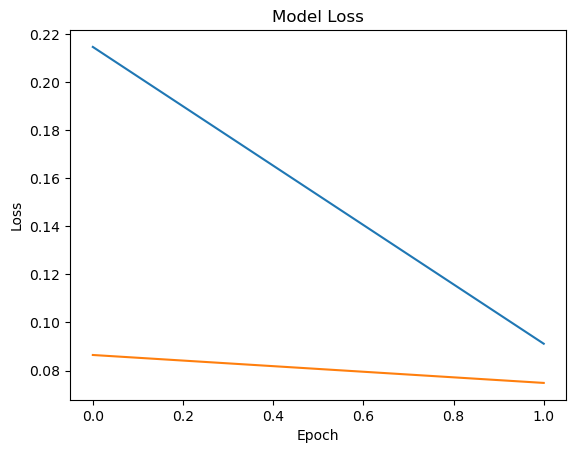

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')